In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from scipy.optimize import curve_fit

---

In [2]:
def GetBias(x, a):
    return a / ((((1.0/(x+1.e-5)) - 2.0)*(1.0 - a))+1.0)

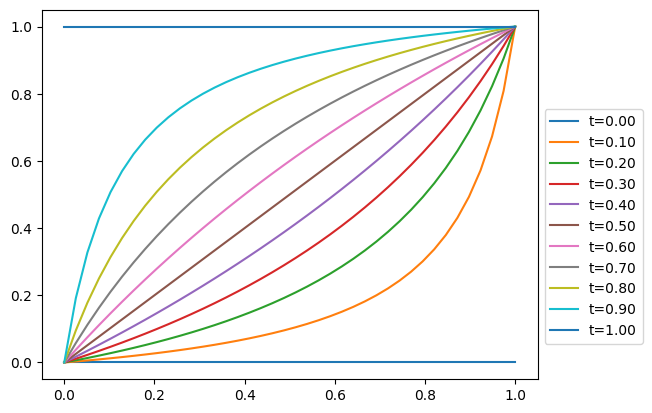

In [3]:
list_time = np.linspace(0,1,11)

for time in list_time:
    x = np.linspace(0,1,40)
    y = [GetBias(a,time) for a in x]
    plt.plot(x,y,label='t=%.2f'%time)
plt.legend(bbox_to_anchor=(1, 0.75))

---

In [4]:
# def GetGain(x, a):
#     if(x < 0.5):
#         gain = GetBias(x = x*2, a = a)
#         return gain*0.5
#     else:
#         gain = GetBias(x = x*2-1.0, a = 1 - a)
#         return gain*0.5 + 0.5

In [5]:
def GetGain(x, a):
    return (x<0.5)*(GetBias(x=x*2,a=a)*0.5)+(x>=0.5)*(GetBias(x=x*2-1.0,a=1-a)*0.5+0.5)

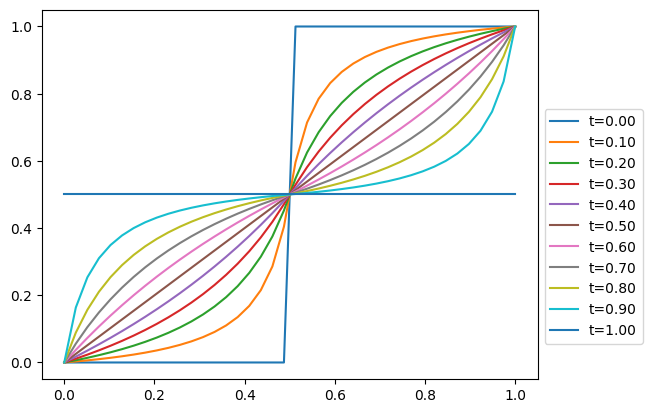

In [6]:
list_time = np.linspace(0,1,11)

for time in list_time:
    x = np.linspace(0,1,40)
    y = [GetGain(a,time) for a in x]
    plt.plot(x,y,label='t=%.2f'%time)
plt.legend(bbox_to_anchor=(1, 0.75))

---

In [23]:
def func(x,a,b):
    return GetBias(x,a) + GetGain(x,b)

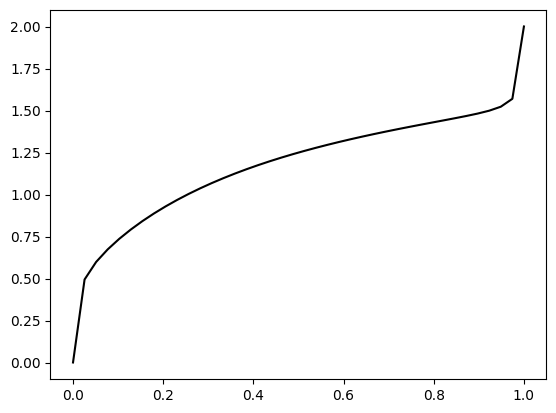

In [26]:
x = np.linspace(0,1,40)
y = func(x,a=0.75,b=0.99)
plt.plot(x,y,'k-')

---

In [8]:
palette = ['#f47a60','#316879']

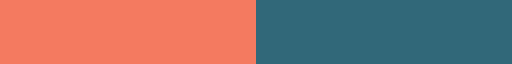

In [9]:
cmap = colors.ListedColormap(palette)
cmap

In [10]:
RGB = {}
for c in ['r','g','b']:
    RGB[c] = [0]
for c in palette:
    R,G,B = colors.hex2color(c)
    RGB['r'].append(R)
    RGB['g'].append(G)
    RGB['b'].append(B)
for c in ['r','g','b']:
    RGB[c].append(1)

x	r	g	b
0.000	0.000	0.000	0.000
0.333	0.957	0.478	0.376
0.667	0.192	0.408	0.475
1.000	1.000	1.000	1.000
[0.99998198 0.99946356]	[0.9534619  0.99898924]	[0.86918586 0.9599521 ]	

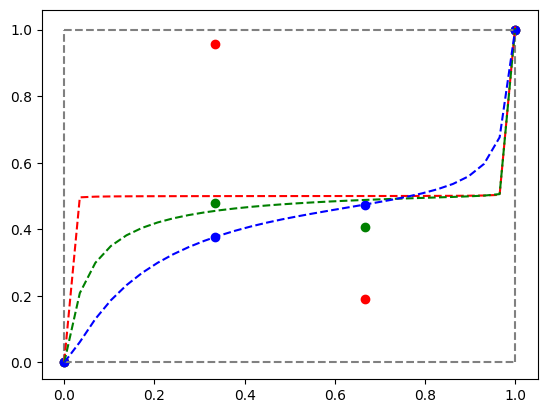

In [11]:
x = np.linspace(0,1,len(palette)+2)

print('x\tr\tg\tb')
for ii,jj in enumerate(x):
    print('%.3f\t%.3f\t%.3f\t%.3f'%(jj,RGB['r'][ii],RGB['g'][ii],RGB['b'][ii]))

for k in [0,1]:
    plt.hlines(y=k, xmin=0, xmax=1, colors='gray', linestyles='--')
    plt.vlines(x=k, ymin=0, ymax=1, colors='gray', linestyles='--')

for c in ['r','g','b']:
    plt.scatter(x,RGB[c], color=c)
    popt, pcov = curve_fit(
        f=func,
        xdata=x,
        ydata=RGB[c],
        bounds=([0,0],[1,1])
    )
    tmp = np.linspace(0,1,30)
    plt.plot(tmp, func(tmp, *popt), '%s--'%c)
    print(popt,end='\t')

---